### Summary

- Create a panorama from connecting images


### Imports and Assets

In [1]:
# Import Libraries
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB9.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

### Panorama

A panorama can be created from several connecting images through the following process:
1. Find keypoints in images
2. Find pairwise connections
3. Estimate pairwise homographies
4. Create and refine homographies
5. Stitch and connect images with blending

In [2]:
# sort images that are in the folder
img_folder = glob.glob(f"boat{os.sep}*")
img_folder.sort()

images = []
# convert from bgr to rgb
for filename in img_folder:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

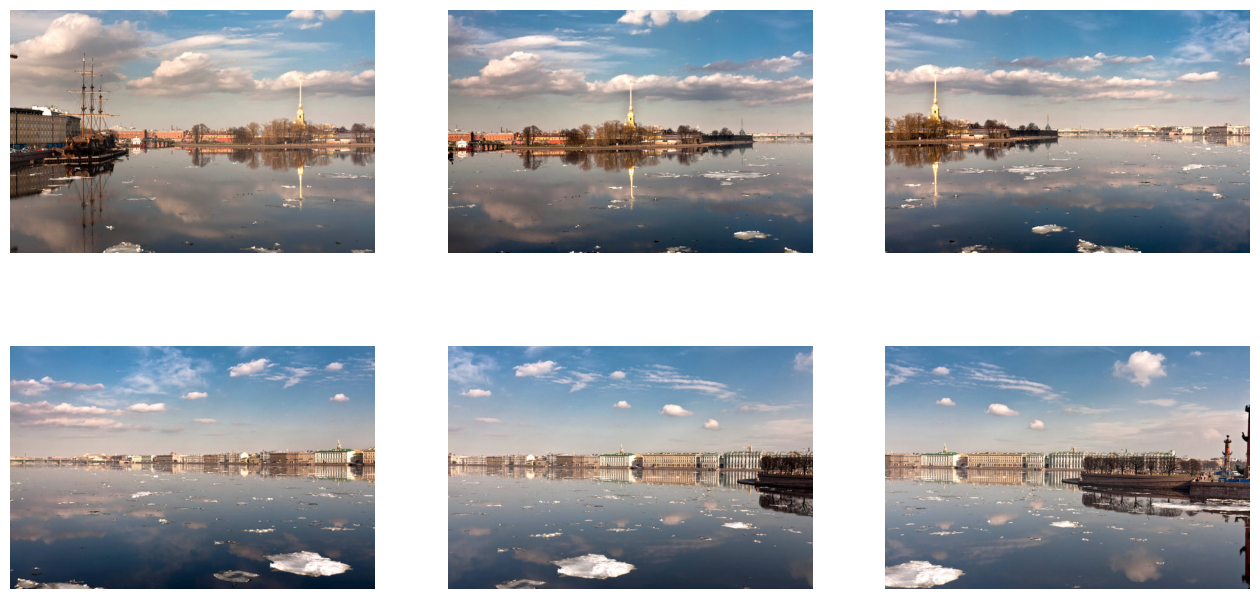

In [6]:
plt.figure(figsize=(16, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.axis("off")

If you see the images, you'll see that there exists some overlaps from the left image to the right image. What stitching does is seamlessly connect those two regions together. For this, we use a stitcher class as follows:

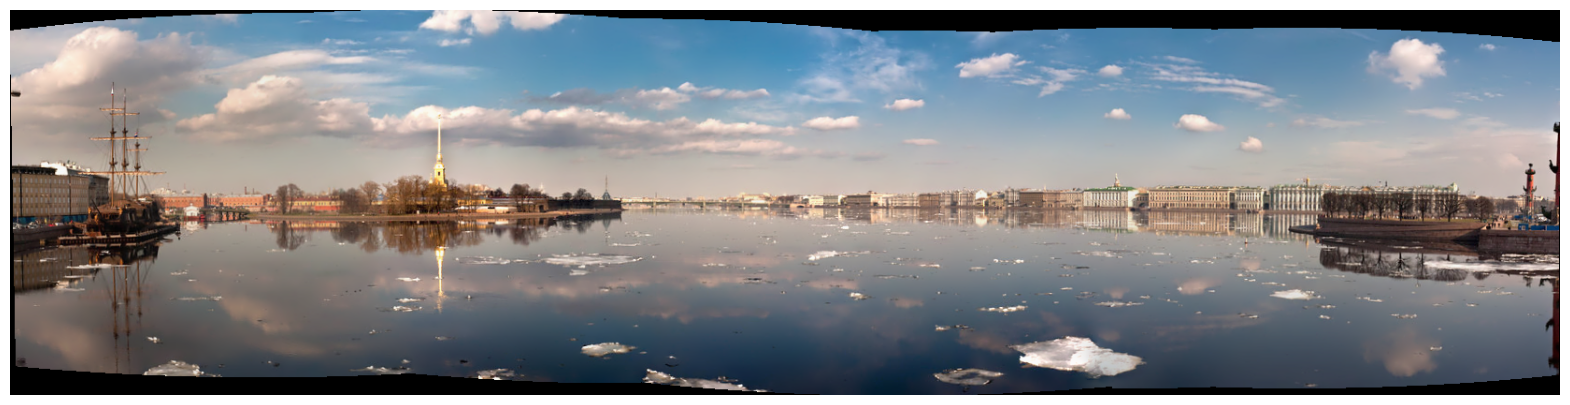

In [8]:
# create a stitcher class
stitcher = cv2.Stitcher_create()

# stitch images together
retval, panorama = stitcher.stitch(images)

# show stitched image (panorama)
if retval == 0:
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.imshow(panorama)

Why are there those black things at the edges? Well if you see the individual images, you can see that each image is not precisely the same height as the other. Take for example the white eiffel tower looking structure. In images 2 and 3, it is not at the same height. The beauty of the stitcher is that it is able to connect that structure (this is considered as a keyframe) with other images of similar keyframe. To compensate that unequal height, it creates those black edges to align it into one connection.